# Aggregation and Grouping

In [2]:
import numpy as np
import pandas as pd

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

## Simple Aggregation
* sum()
* mean()
* ...

In [3]:
se = pd.Series(range(5))
se

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [4]:
se.sum()

10

In [5]:
se.describe()

count    5.000000
mean     2.000000
std      1.581139
min      0.000000
25%      1.000000
50%      2.000000
75%      3.000000
max      4.000000
dtype: float64

## GroupBy
* Why we need groupby? Simple aggregations can give you a flavor of your dataset, but often we would prefer to aggregate conditionally on some label or index
* The name "group by" comes from a command in the SQL database language
* Split, apply, combine

In [6]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [8]:
list(df.groupby('key'))

[('A',
    key  data
  0   A     0
  3   A     3),
 ('B',
    key  data
  1   B     1
  4   B     4),
 ('C',
    key  data
  2   C     2
  5   C     5)]

In [6]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


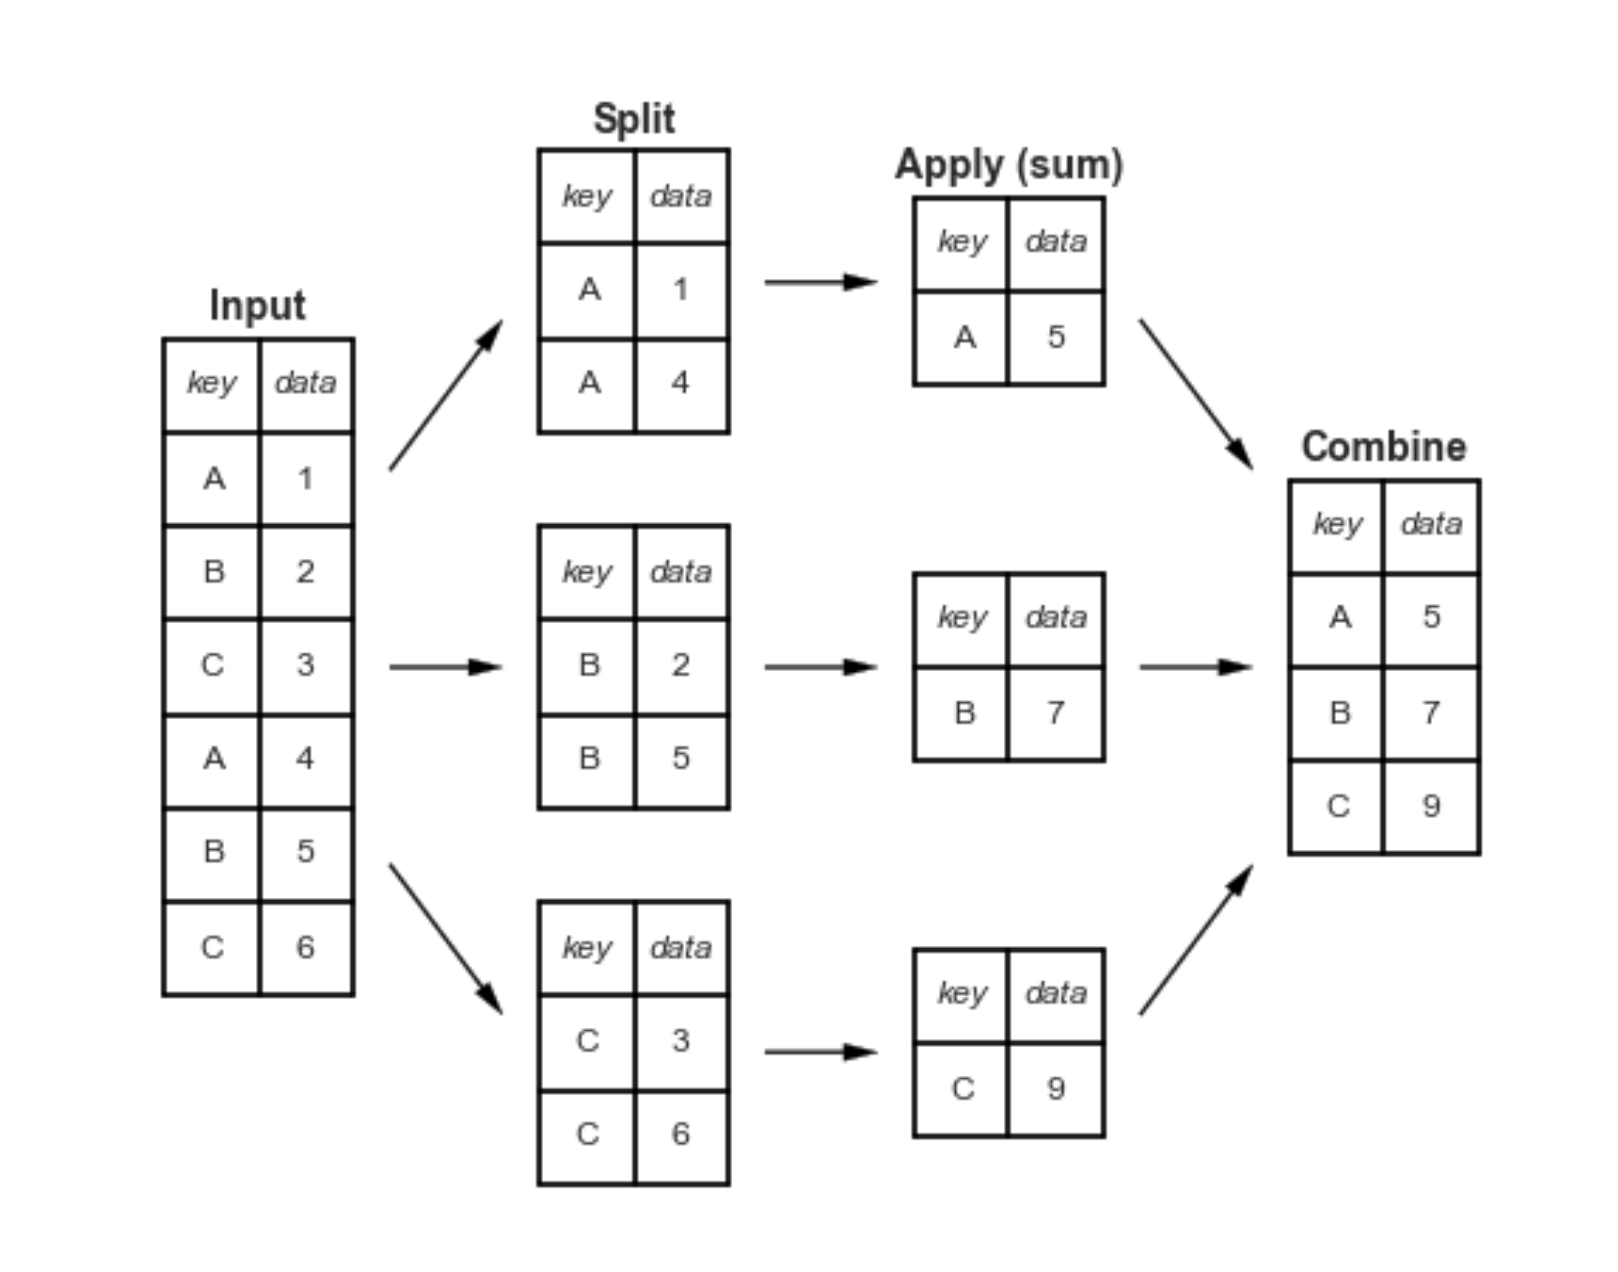

In [12]:
from IPython.display import display, Image
display(Image(filename='data/split_apply_combine.png', width=800, height=400))

In [10]:
df.groupby('key').mean()

,data
key,
A,1.5
B,2.5
C,3.5


### GroupBy Object
The GroupBy object is a very flexible abstraction. You can simply treat it as if it's a collection of DataFrame

In [11]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.shape

(891, 15)

In [12]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [131]:
titanic.groupby('deck')[['age', 'fare']].mean()

,age,fare
deck,,
A,44.833333,39.623887
B,34.955556,113.505764
C,36.086667,100.151341
D,39.032258,57.244576
E,38.116667,46.026694
F,19.954545,18.696792
G,14.750000,13.581250


In [13]:
titanic.groupby('who').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone
who,,,,,,,,,,,,,,
child,83,83,83,83,83,83,83,83,83,83,13,83,83,83
man,537,537,537,413,537,537,537,537,537,537,99,537,537,537
woman,271,271,271,218,271,271,271,269,271,271,91,269,271,271


In [23]:
titanic.groupby('who')['survived'].sum()

who
child     49
man       88
woman    205
Name: survived, dtype: int64

## Aggregate

In [14]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [15]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [16]:
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [17]:
titanic.groupby('who')['age'].aggregate(['min', 'max', 'median'])

,min,max,median
who,,,
child,0.42,15.0,5.0
man,16.00,80.0,30.0
woman,16.00,63.0,30.0


# Time Series
Pandas was developed for financial modeling, so it contains an extensive set of tools for working with dates, times, and time-indexed data. 
- *Time stamps* reference particular moments in time (e.g., July 4th, 2015 at 7:00am).
- *Time intervals* and *periods* reference a length of time between a particular beginning and end point; for example, the year 2015. Periods usually reference a special case of time intervals in which each interval is of uniform length and does not overlap (e.g., 24 hour-long periods comprising days).
- *Time deltas* or *durations* reference an exact length of time (e.g., a duration of 22.56 seconds).

## Dates and Times in Python


## Python: ``datetime`` and ``dateutil``

In [20]:
from datetime import datetime
datetime(year=2019, month=6, day=15)

datetime.datetime(2019, 6, 15, 0, 0)

In [21]:
from dateutil import parser
date = parser.parse("15th of June, 2019")
date

datetime.datetime(2019, 6, 15, 0, 0)

In [22]:
from dateutil import parser
date = parser.parse("1st of June, 2019")
date

datetime.datetime(2019, 6, 1, 0, 0)

[strftime](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior): create a string representing the time under the control of an explicit format string.

* %A - weekday as local's full name

* %d - Day of the month
* %Y - Year

In [23]:
date.strftime('%A')

'Saturday'

In [24]:
date.strftime('%B')

'June'

In [25]:
date.strftime('%Y %B %d, %A')

'2019 June 01, Saturday'

## Numpy: ``datetime64``
 ``datetime64`` dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly.

``datetime64`` requires a very specific input format:

In [62]:
import numpy as np
date = np.array('2019-06-15', dtype=np.datetime64)
date

array('2019-06-15', dtype='datetime64[D]')

In [63]:
date + np.arange(10)

array(['2019-06-15', '2019-06-16', '2019-06-17', '2019-06-18',
       '2019-06-19', '2019-06-20', '2019-06-21', '2019-06-22',
       '2019-06-23', '2019-06-24'], dtype='datetime64[D]')

Because the ``datetime64`` object is limited to 64-bit precision, the range of encodable times is $2^{64}$ times this fundamental unit.
In other words, ``datetime64`` imposes a trade-off between *time resolution* and *maximum time span*.

https://docs.scipy.org/doc/numpy/reference/arrays.datetime.html

|Code    | Meaning     | Time span (relative) | Time span (absolute)   |
|--------|-------------|----------------------|------------------------|
| ``Y``  | Year	       | ± 9.2e18 years       | [9.2e18 BC, 9.2e18 AD] |
| ``M``  | Month       | ± 7.6e17 years       | [7.6e17 BC, 7.6e17 AD] |
| ``W``  | Week	       | ± 1.7e17 years       | [1.7e17 BC, 1.7e17 AD] |
| ``D``  | Day         | ± 2.5e16 years       | [2.5e16 BC, 2.5e16 AD] |
| ``h``  | Hour        | ± 1.0e15 years       | [1.0e15 BC, 1.0e15 AD] |
| ``m``  | Minute      | ± 1.7e13 years       | [1.7e13 BC, 1.7e13 AD] |
| ``s``  | Second      | ± 2.9e12 years       | [ 2.9e9 BC, 2.9e9 AD]  |
| ``ms`` | Millisecond | ± 2.9e9 years        | [ 2.9e6 BC, 2.9e6 AD]  |
| ``us`` | Microsecond | ± 2.9e6 years        | [290301 BC, 294241 AD] |
| ``ns`` | Nanosecond  | ± 292 years          | [ 1678 AD, 2262 AD]    |
| ``ps`` | Picosecond  | ± 106 days           | [ 1969 AD, 1970 AD]    |
| ``fs`` | Femtosecond | ± 2.6 hours          | [ 1969 AD, 1970 AD]    |
| ``as`` | Attosecond  | ± 9.2 seconds        | [ 1969 AD, 1970 AD]    |

## Pandas
Pandas builds upon all the tools just discussed to provide a ``Timestamp`` object, which combines the ease-of-use of ``datetime`` and ``dateutil`` with the efficient storage and vectorized interface of ``numpy.datetime64``.

In [26]:
import pandas as pd
date = pd.to_datetime("15th of June, 2019")
date

Timestamp('2019-06-15 00:00:00')

In [27]:
date.strftime('%A')

'Saturday'

In [28]:
date + pd.to_timedelta(np.arange(10), 'D')

DatetimeIndex(['2019-06-15', '2019-06-16', '2019-06-17', '2019-06-18',
               '2019-06-19', '2019-06-20', '2019-06-21', '2019-06-22',
               '2019-06-23', '2019-06-24'],
              dtype='datetime64[ns]', freq=None)

### Pandas - Index by Time
Pandas time series tools really become useful is when you begin to index data by timestamps.

In [70]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04',
                          '2016-07-04', '2016-08-04',
                          '2017-07-04', '2017-08-04',
                          '2018-07-04', '2018-08-04'])
data = pd.Series(np.arange(10), index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
2016-07-04    4
2016-08-04    5
2017-07-04    6
2017-08-04    7
2018-07-04    8
2018-08-04    9
dtype: int64

In [71]:
data['2018']

2018-07-04    8
2018-08-04    9
dtype: int64

In [72]:
data['2017':'2018']

2017-07-04    6
2017-08-04    7
2018-07-04    8
2018-08-04    9
dtype: int64

In [74]:
data['2017-07-04':'2018-08-04']

2017-07-04    6
2017-08-04    7
2018-07-04    8
2018-08-04    9
dtype: int64

In [75]:
data['2017-07':'2018-07']

2017-07-04    6
2017-08-04    7
2018-07-04    8
dtype: int64

### Pandas - Time Series Data Structure
- For *time stamps*, Pandas provides the ``Timestamp`` type. As mentioned before, it is essentially a replacement for Python's native ``datetime``, but is based on the more efficient ``numpy.datetime64`` data type. The associated Index structure is ``DatetimeIndex``.
- For *time Periods*, Pandas provides the ``Period`` type. This encodes a fixed-frequency interval based on ``numpy.datetime64``. The associated index structure is ``PeriodIndex``.
- For *time deltas* or *durations*, Pandas provides the ``Timedelta`` type. ``Timedelta`` is a more efficient replacement for Python's native ``datetime.timedelta`` type, and is based on ``numpy.timedelta64``. The associated index structure is ``TimedeltaIndex``.

In [29]:
dates = pd.to_datetime(datetime(2019, 6, 15)) # single date yields a Timestamp
dates  

Timestamp('2019-06-15 00:00:00')

In [30]:
dates = pd.to_datetime([datetime(2019, 6, 15), '16th of June, 2019',
                       '2019-Jun-17', '06-18-2019', '20190619'])  # series of dates yields a DatetimeIndex
dates

DatetimeIndex(['2019-06-15', '2019-06-16', '2019-06-17', '2019-06-18',
               '2019-06-19'],
              dtype='datetime64[ns]', freq=None)

In [31]:
dates.to_period('D')

PeriodIndex(['2019-06-15', '2019-06-16', '2019-06-17', '2019-06-18',
             '2019-06-19'],
            dtype='period[D]')

In [84]:
dates.to_period('H')

PeriodIndex(['2019-06-15 00:00', '2019-06-16 00:00', '2019-06-17 00:00',
             '2019-06-18 00:00', '2019-06-19 00:00'],
            dtype='period[H]', freq='H')

In [85]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '2 days', '3 days', '4 days'], dtype='timedelta64[ns]', freq=None)

In [89]:
dates.to_period('H') - dates[0].to_period('H')

Index([<0 * Hours>, <24 * Hours>, <48 * Hours>, <72 * Hours>, <96 * Hours>], dtype='object')

### Pandas - Range
* ``pd.date_range()``
* ``pd.period_range()``
* ``pd.timedelta_range()``

In [32]:
pd.date_range('2019-06-15', '2019-06-21')

DatetimeIndex(['2019-06-15', '2019-06-16', '2019-06-17', '2019-06-18',
               '2019-06-19', '2019-06-20', '2019-06-21'],
              dtype='datetime64[ns]', freq='D')

In [92]:
pd.date_range('2019-06-15', periods=7)

DatetimeIndex(['2019-06-15', '2019-06-16', '2019-06-17', '2019-06-18',
               '2019-06-19', '2019-06-20', '2019-06-21'],
              dtype='datetime64[ns]', freq='D')

In [93]:
pd.date_range('2019-06-15', periods=7, freq='H')

DatetimeIndex(['2019-06-15 00:00:00', '2019-06-15 01:00:00',
               '2019-06-15 02:00:00', '2019-06-15 03:00:00',
               '2019-06-15 04:00:00', '2019-06-15 05:00:00',
               '2019-06-15 06:00:00'],
              dtype='datetime64[ns]', freq='H')

In [97]:
pd.date_range('2019-06-15', periods=7, freq='min')

DatetimeIndex(['2019-06-15 00:00:00', '2019-06-15 00:01:00',
               '2019-06-15 00:02:00', '2019-06-15 00:03:00',
               '2019-06-15 00:04:00', '2019-06-15 00:05:00',
               '2019-06-15 00:06:00'],
              dtype='datetime64[ns]', freq='T')

[Offet Aliases](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases)
* B - business day frequency
* D - calendar day frequency
* H - hourly frequency
* T, min - hourly frequency

In [41]:
from pandas_datareader import data

aapl = data.DataReader('AAPL', start='2018', 
                       data_source='yahoo')
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,43.075001,42.314999,42.540001,43.064999,102223600.0,41.135757
2018-01-03,43.637501,42.990002,43.132500,43.057499,118071600.0,41.128597
2018-01-04,43.367500,43.020000,43.134998,43.257500,89738400.0,41.319626
2018-01-05,43.842499,43.262501,43.360001,43.750000,94640000.0,41.790066
2018-01-08,43.902500,43.482498,43.587502,43.587502,82271200.0,41.634846


In [42]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

<AxesSubplot:xlabel='Date'>

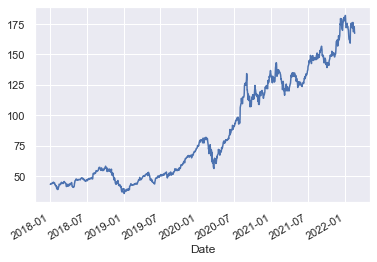

In [43]:
aapl['Close'].plot()

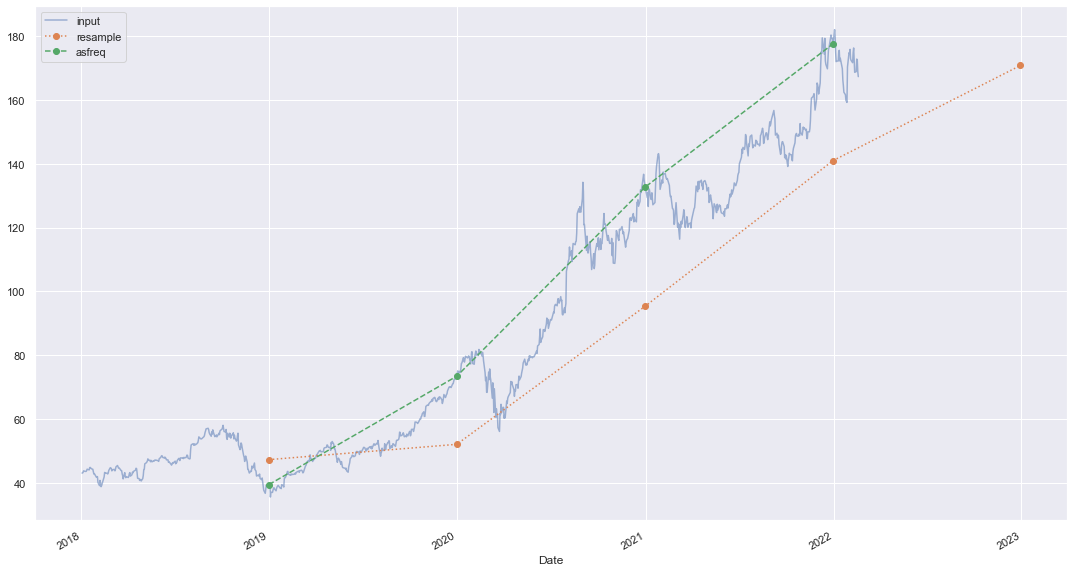

In [44]:
aapl['Close'].plot(alpha=0.5, style='-')
aapl['Close'].resample('BA').mean().plot(style=':o') # BA - business year end frequency
aapl['Close'].asfreq('BA').plot(style='--o')
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

Doc - [Frequency Conversion](http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#frequency-conversion)